In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Hacky String Replace -- Get rid of bad text, so numbers are easily parsed
  * remove the '%'
  * remove the "*"
  * Not any N/A  is now 0.0 !!!!

In [2]:
infile = 'my401k_perf_March2023.csv'
outfile = 'convert.csv'
search_text = 'N/A'
replace_text = '0.0%'

original_df = pd.read_csv(infile)
percent_text = '%'
blank= ''
asterisk_text ='*'

with open(infile, 'r') as file:
  
    # Reading the content of the file
    # using the read() function and storing
    # them in a new variable
    data = file.read()
  
    # Searching and replacing the text
    # using the replace() function
    data = data.replace(search_text, replace_text)
    data = data.replace(percent_text, blank)
    data = data.replace(asterisk_text, blank)

# Opening our text file in write only
# mode to write the replaced content
with open(outfile, 'w') as file:
  
    # Writing the replaced data in our
    # text file
    file.write(data)

# Printing Text replaced
print("Text replaced, wrote: " +  outfile)

Text replaced, wrote: convert.csv


In [3]:
#original_df.head()

In [4]:
new_csv = outfile
my401k_df = pd.read_csv(new_csv)
l = (my401k_df['Category'] == '0.0')
my401k_df.loc[l, 'Category'] = 'Target Fund'
my401k_df['ticker'] = ''
l = (my401k_df['Name/Inception Date'].str.contains(pat='\('))
my401k_df.loc[l, 'ticker'] = my401k_df.loc[l, 'Name/Inception Date'].apply(lambda st: st[st.find("(")+1:st.find(")")])
#my401k_df['ticker'] = my401k_df['Name/Inception Date'].apply(lambda st: st[st.find("(")+1:st.find(")")])

temp_df = pd.DataFrame(my401k_df['Name/Inception Date'].str.extract(r'(\d{2})[/.-](\d{2})[/.-](\d{4})$'))
temp_df.columns = ['month', 'day', 'year']
my401k_df['Inception Date'] = pd.to_datetime(temp_df[['year', 'month', 'day']])
my401k_df['YearsOld'] = datetime.now().year - my401k_df['Inception Date'].dt.year
my401k_df['YearsOld'] = my401k_df['YearsOld'].fillna(0.0)
del temp_df

#my401k_df['Name'] = my401k_df['Name/Inception Date'].str.extract(r"^(.+?) ?(?:\d|\(|$)")
my401k_df['Name'] = my401k_df['Name/Inception Date'].str.split("\s+[\/\(]").str[0]
#l = (my401k_df['Inception Date'].str.contains(pat='\/(dd)\/'))
#my401k_df.loc[l, 'Inception Date'] = my401k_df.loc[l, 'Name/Inception Date'].apply(lambda st: st[st.find("(")+1:st.find(")")])

my401k_df.head()

Name/Inception Date        Asset Class   Category  \
0   DODGE & COX STOCK X (DOXGX)05/02/2022  Stock Investments  Large Cap   
1         FID 500 INDEX (FXAIX)02/17/1988  Stock Investments  Large Cap   
2     FID CONTRAFUND K6 (FLCNX)05/25/2017  Stock Investments  Large Cap   
3  JPM LG CAP GROWTH R6 (JLGMX)02/28/1992  Stock Investments  Large Cap   
4  VAN FTSE SOC IDX ADM (VFTAX)01/14/2003  Stock Investments  Large Cap   

  Plan-specific option All tooltip content.  1 Year Avg  3 Year  5 Year  \
0                                       Yes        0.00    0.00    0.00   
1                                        No       -7.71   12.14    9.81   
2                                       Yes      -12.21    9.10    8.37   
3                                       Yes      -10.89   13.55   13.26   
4                                       Yes      -10.79   10.69    9.68   

   10 Year/LOF Avg Returns As Of  Daily Cumulative  ...  \
0         1.49        02/28/2023             -1.46  ...   
1        12.24        02/28/2023             -1.10  ...   
2        10.91        02/28/2023             -1.22  ...   
3        15.51        02/28/2023             -0.92  ...   
4        12.69        02/28/2023             -1.03  ...   

   Cumulative Returns As Of  1 Month 3 Months  Returns As Of  \
0                03/17/2023    -3.25    -1.58     02/28/2023   
1                03/17/2023    -2.44    -2.29     02/28/2023   
2                03/17/2023    -1.80    -0.66     02/28/2023   
3                03/17/2023    -2.33    -2.95     02/28/2023   
4                03/17/2023    -2.11    -1.48     02/28/2023   

   Gross Expense Ratio           Shareholder Fees  ticker Inception Date  \
0                 0.46  No additional fees apply.   DOXGX     2022-05-02   
1                 0.02  No additional fees apply.   FXAIX     1988-02-17   
2                 0.45  No additional fees apply.   FLCNX     2017-05-25   
3                 0.51  No additional fees apply.   JLGMX     1992-02-28   
4                 0.14  No additional fees apply.   VFTAX     2003-01-14   

  YearsOld                  Name  
0      1.0   DODGE & COX STOCK X  
1     35.0         FID 500 INDEX  
2      6.0     FID CONTRAFUND K6  
3     31.0  JPM LG CAP GROWTH R6  
4     20.0  VAN FTSE SOC IDX ADM  

[5 rows x 22 columns]

<Figure size 1000x1600 with 0 Axes>

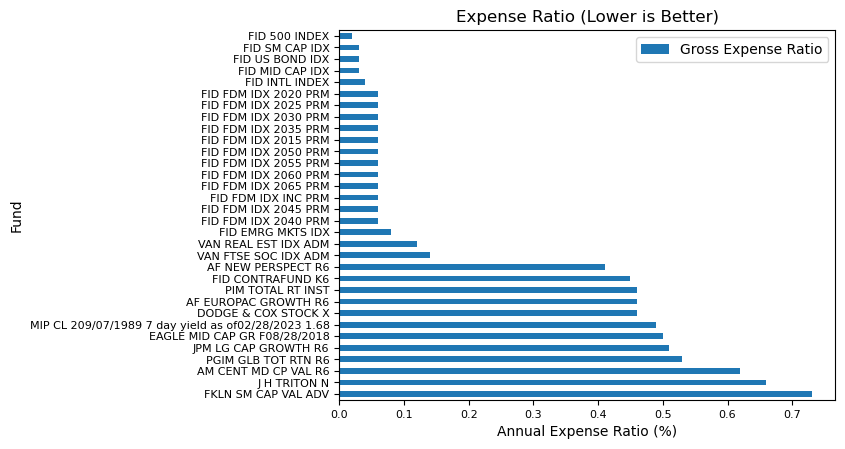

In [5]:
# Get the Horizontal bar
cols = ['Name', 'Gross Expense Ratio', ]
#my401k_df[cols].head()
chart_df = my401k_df[cols].copy()
#chart_df = chart_df.sort_values('Gross Expense Ratio', ascending=True)
chart_df = chart_df.sort_values('Gross Expense Ratio', ascending=False)

chart_df = chart_df.set_index('Name')
#chart_df.head()

plt.figure(figsize=(10, 16))
ax = chart_df.plot.barh(fontsize=8)
ax.set_facecolor('xkcd:white')
ax.set_xlabel('Annual Expense Ratio (%)')
ax.set_ylabel('Fund')
plt.title('Expense Ratio (Lower is Better)')
#plt.savefig('Exp_v_10yr_perf.png', dpi=300, bbox_inches='tight')
plt.show()

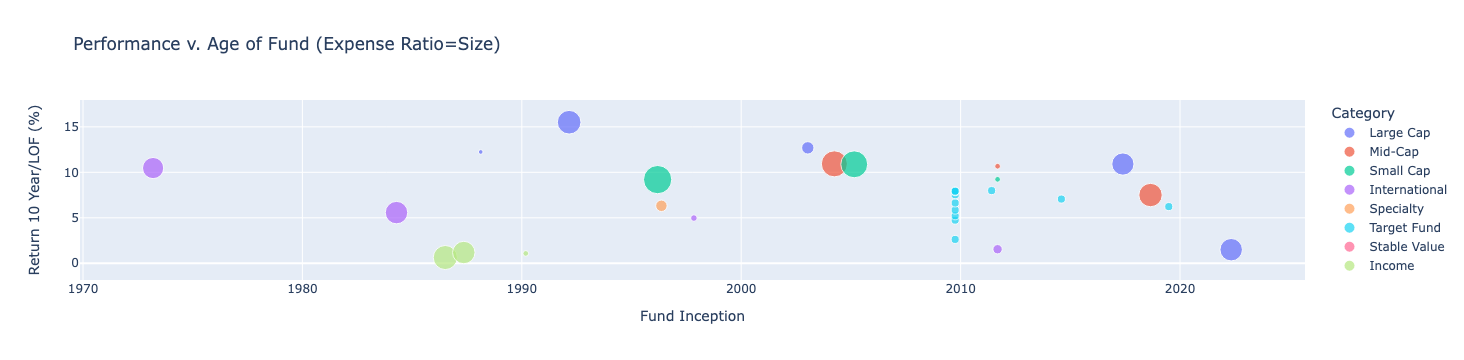

In [6]:
fig = px.scatter(my401k_df, x="Inception Date", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name'],
                    labels={
                     "Inception Date": "Fund Inception",
                     "10 Year/LOF": "Return 10 Year/LOF (%)",
                 },
                title="Performance v. Age of Fund (Expense Ratio=Size)")
fig.show()

## Hypothetical (NOT REALISTIC) 100K invested in 2000 to 2020 (20 years)
  * assume annualize return
  * assume feees taken every year
  * only funds available before 2020

<Figure size 1000x1600 with 0 Axes>

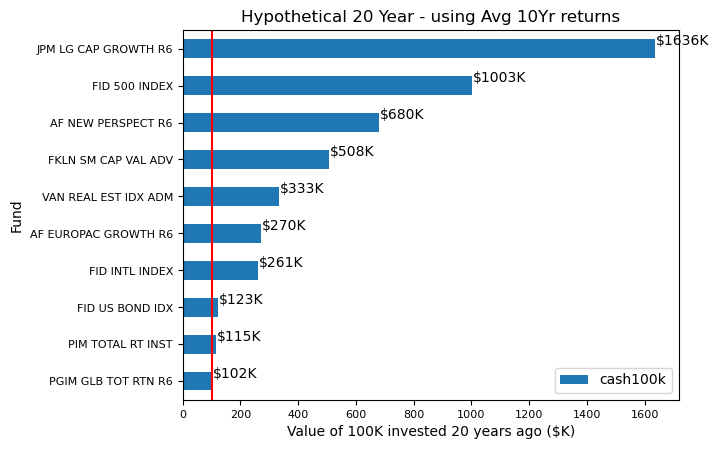

In [7]:
l = my401k_df['Inception Date'].dt.year < 2000

startingCashK = 100000

perf_df = my401k_df.loc[l,].copy()
years = 20
perf_df['annualized'] = (((perf_df["10 Year/LOF"] - perf_df['Gross Expense Ratio'] ) + 100.0)/100) ** years
perf_df['cash100k'] = perf_df['annualized'] * startingCashK 
cols = ['Name',  'cash100k' ]
#cols = ['Name', 'cash100k', 'cash100k_nofee', 'feeDelta' ]

chart_df = perf_df[cols].copy()
#chart_df = chart_df.sort_values('cash100k', ascending=True)
#cols = ['Name', 'cash100k', 'cash100k_nofee', 'feeDelta' ]

chart_df['cash100k'] = chart_df['cash100k'] / 1000
chart_df['cash100k'] = chart_df['cash100k'].astype(int)

chart_df = chart_df.sort_values('cash100k', ascending=True)


chart_df = chart_df.set_index('Name')
#chart_df.head()

plt.figure(figsize=(10, 16))
ax = chart_df.plot.barh(fontsize=8)
plt.axvline(x = startingCashK/1000, color = 'r', label = 'axvline - full height')
ax.set_facecolor('xkcd:white')
ax.set_xlabel('Value of 100K invested 20 years ago ($K)')
ax.set_ylabel('Fund')
plt.title('Hypothetical 20 Year - using Avg 10Yr returns')
#plt.savefig('Exp_v_10yr_perf.png', dpi=300, bbox_inches='tight')

y = list(chart_df['cash100k'].values)
for i, v in enumerate(y):
    ax.text(v + 3, i + .10, '$' + str(v) + 'K',
            color = 'k', fontweight = 'normal')

plt.show()

#chart_df.head()

<Figure size 1000x1600 with 0 Axes>

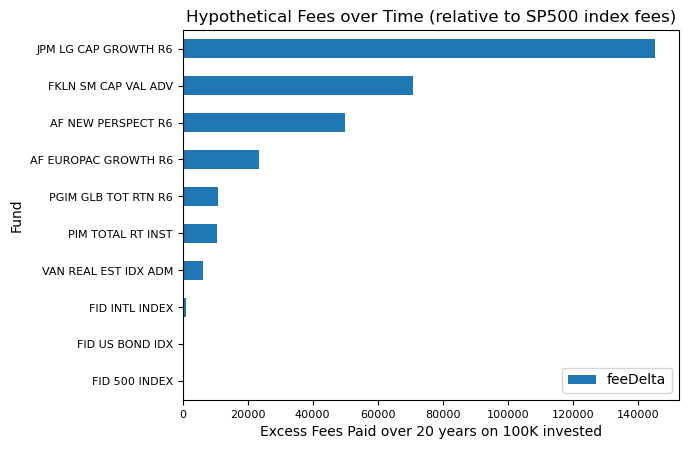

In [8]:
l = my401k_df['Inception Date'].dt.year < 2000

startingCashK = 100000
reasonableFee = 0.02

perf_df = my401k_df.loc[l,].copy()
years = 20
perf_df['annualized'] = (((perf_df["10 Year/LOF"] - perf_df['Gross Expense Ratio'] ) + 100.0)/100) ** years
perf_df['annualized_reasonable'] = (((perf_df["10 Year/LOF"] - reasonableFee ) + 100.0)/100) ** years
perf_df['feeDelta'] = (perf_df['annualized_reasonable'] - perf_df['annualized']) * startingCashK 
cols = ['Name',  'feeDelta' ]

chart_df = perf_df[cols].copy()
chart_df = chart_df.sort_values('feeDelta', ascending=True)


chart_df = chart_df.set_index('Name')

plt.figure(figsize=(10, 16))
ax = chart_df.plot.barh(fontsize=8)
ax.set_facecolor('xkcd:white')
ax.set_xlabel('Excess Fees Paid over 20 years on 100K invested')
ax.set_ylabel('Fund')
plt.title('Hypothetical Fees over Time (relative to SP500 index fees)')
#plt.savefig('Exp_v_10yr_perf.png', dpi=300, bbox_inches='tight')
plt.legend(loc='lower right')
plt.show()


<Figure size 1000x1600 with 0 Axes>

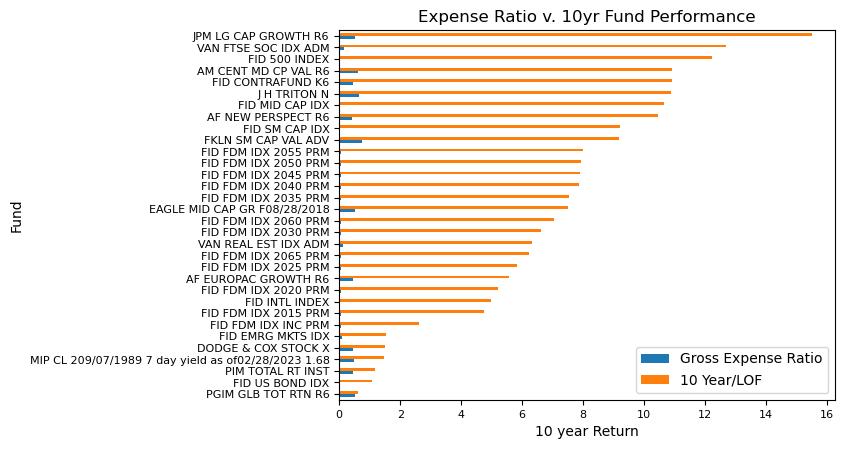

In [9]:
# Get the Horizontal bar
cols = ['Name', 'Gross Expense Ratio', '10 Year/LOF']
#my401k_df[cols].head()
chart_df = my401k_df[cols].copy()
#chart_df = chart_df.sort_values('Gross Expense Ratio', ascending=True)
chart_df = chart_df.sort_values('10 Year/LOF', ascending=True)

chart_df = chart_df.set_index('Name')
#chart_df.head()

plt.figure(figsize=(10, 16))
ax = chart_df.plot.barh(fontsize=8)
ax.set_facecolor('xkcd:white')
ax.set_xlabel('10 year Return')
ax.set_ylabel('Fund')
plt.title('Expense Ratio v. 10yr Fund Performance')
plt.savefig('Exp_v_10yr_perf.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
#sns.boxplot(data=my401k_df, x="10 Year/LOF", y="Asset Class", hue="Category")

In [11]:
#sns.boxplot(data=my401k_df, x="Gross Expense Ratio", y="Asset Class", hue="Category")

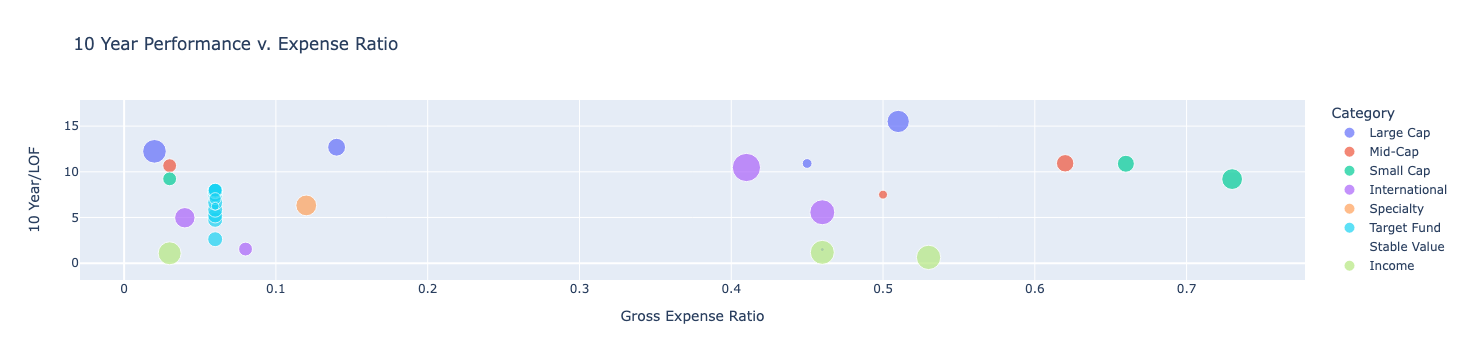

In [12]:
fig = px.scatter(my401k_df, x="Gross Expense Ratio", y="10 Year/LOF", color="Category",
                      hover_data=['Name'],
                    size='YearsOld',
                    title="10 Year Performance v. Expense Ratio")
fig.show()
#fig.write_html("expense_perf_5yr.html")

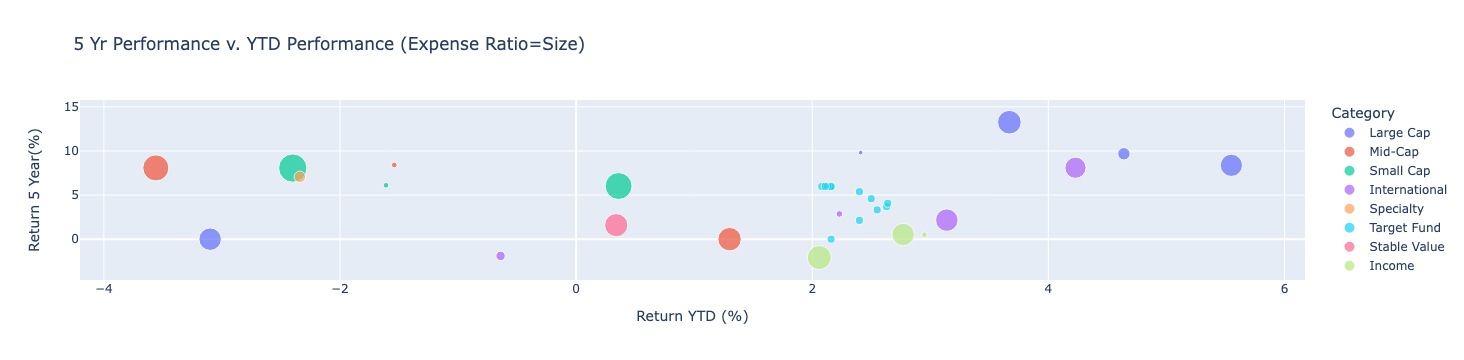

In [13]:
fig = px.scatter(my401k_df, x="YTD", y="5 Year", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name/Inception Date'],
                         labels={
                     "YTD": "Return YTD (%)",
                     "5 Year": "Return 5 Year(%)",
                 },
                title="5 Yr Performance v. YTD Performance (Expense Ratio=Size)")
            
fig.show()
fig.write_html("expense_perf_5yr.html")

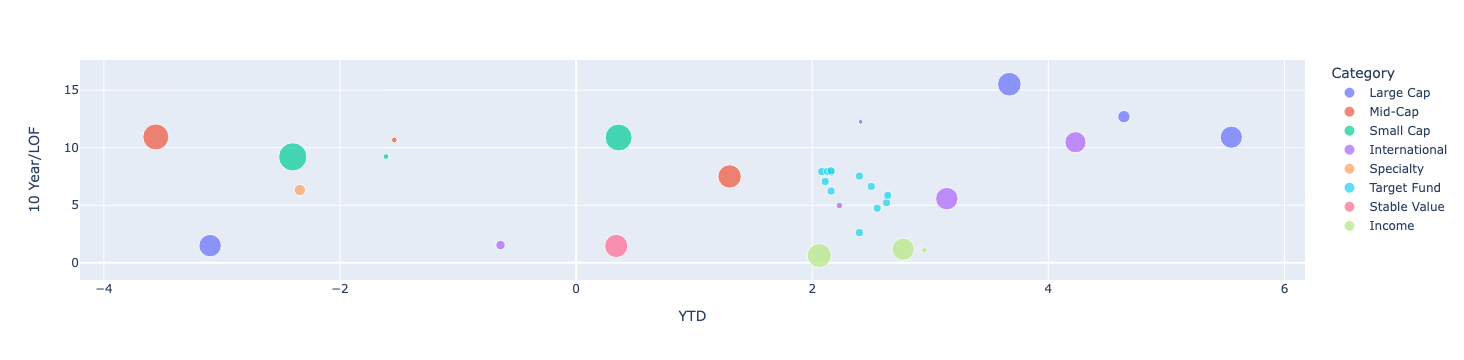

In [14]:
fig = px.scatter(my401k_df, x="YTD", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name/Inception Date'])
fig.show()
fig.write_html("expense_perf_10yr.html")

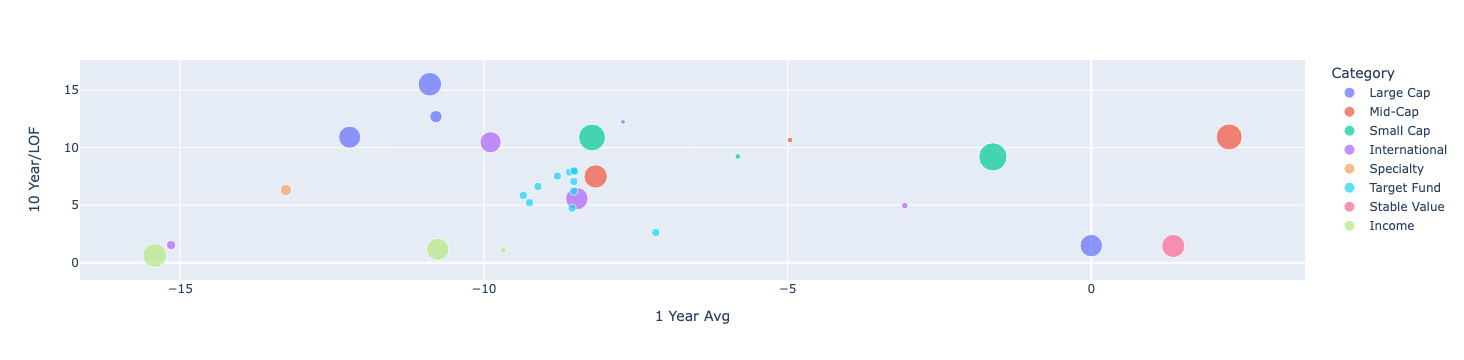

In [15]:
fig = px.scatter(my401k_df, x="1 Year Avg", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name/Inception Date'])
fig.show()
fig.write_html("expense_perf_10_v_1yr.html")

In [16]:
#my401k_df['1 Year Avg'].describe()

In [17]:
list(my401k_df.columns)

['Name/Inception Date',
 'Asset Class',
 'Category',
 'Plan-specific option All tooltip content.',
 '1 Year Avg',
 '3 Year',
 '5 Year',
 '10 Year/LOF',
 'Avg Returns As Of',
 'Daily Cumulative',
 'MTD',
 'YTD',
 'Cumulative Returns As Of',
 '1 Month',
 '3 Months',
 'Returns As Of',
 'Gross Expense Ratio',
 'Shareholder Fees',
 'ticker',
 'Inception Date',
 'YearsOld',
 'Name']

In [18]:
my401k_df['Category'].value_counts()

Target Fund      12
Large Cap         5
International     4
Mid-Cap           3
Small Cap         3
Income            3
Specialty         1
Stable Value      1
Name: Category, dtype: int64

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = my401k_df.select_dtypes(include=numerics)
num_df['name'] =  my401k_df['Name/Inception Date']
num_df['category'] =  my401k_df['Category']
num_df.head()

1 Year Avg  3 Year  5 Year  10 Year/LOF  Daily Cumulative   MTD   YTD  \
0        0.00    0.00    0.00         1.49             -1.46 -6.07 -3.10   
1       -7.71   12.14    9.81        12.24             -1.10 -1.23  2.41   
2      -12.21    9.10    8.37        10.91             -1.22  0.28  5.55   
3      -10.89   13.55   13.26        15.51             -0.92 -0.06  3.67   
4      -10.79   10.69    9.68        12.69             -1.03 -0.73  4.64   

   1 Month  3 Months  Gross Expense Ratio  YearsOld  \
0    -3.25     -1.58                 0.46       1.0   
1    -2.44     -2.29                 0.02      35.0   
2    -1.80     -0.66                 0.45       6.0   
3    -2.33     -2.95                 0.51      31.0   
4    -2.11     -1.48                 0.14      20.0   

                                     name   category  
0   DODGE & COX STOCK X (DOXGX)05/02/2022  Large Cap  
1         FID 500 INDEX (FXAIX)02/17/1988  Large Cap  
2     FID CONTRAFUND K6 (FLCNX)05/25/2017  Large Cap  
3  JPM LG CAP GROWTH R6 (JLGMX)02/28/1992  Large Cap  
4  VAN FTSE SOC IDX ADM (VFTAX)01/14/2003  Large Cap

## Performance over Life of Fund or 10 Years
  * versus YTD
  * versus Expense Ratio

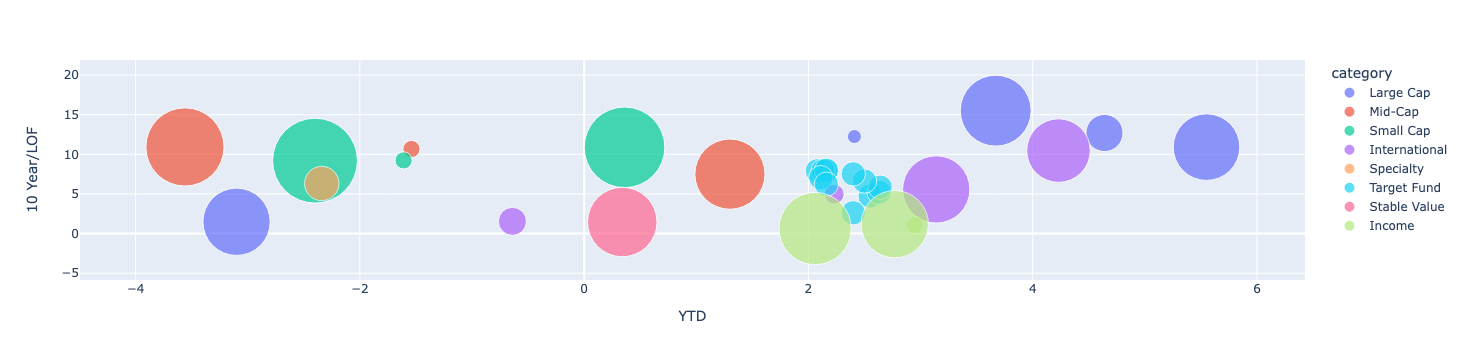

In [20]:
fig = px.scatter(num_df, x="YTD", y="10 Year/LOF",size="Gross Expense Ratio", color="category",
                 hover_name="name", size_max=60)
fig.show()

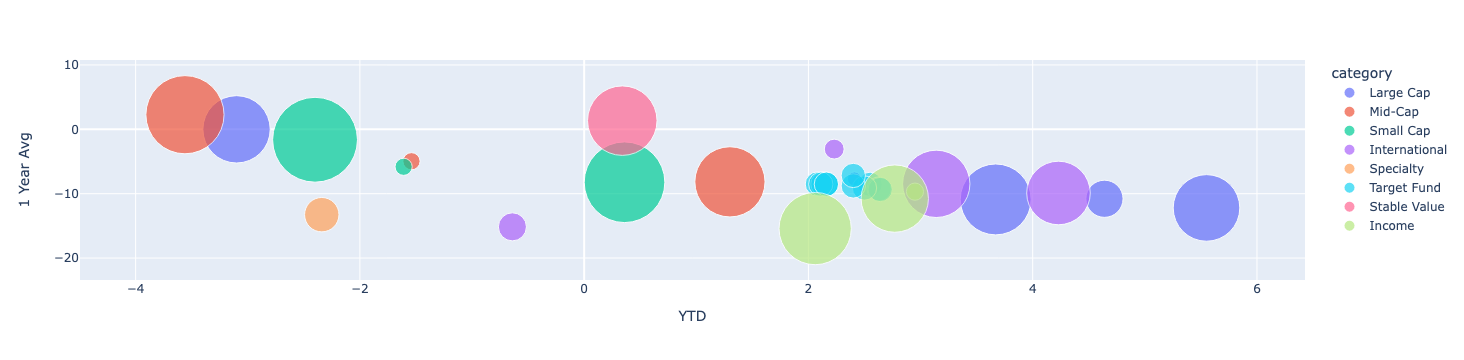

In [21]:
fig = px.scatter(num_df, x="YTD", y="1 Year Avg",size="Gross Expense Ratio", color="category",
                 hover_name="name", size_max=60)
fig.show()

# Done - ZZZZZ